In [1]:
import pandas as pd
import seaborn as sns
from summarytools import dfSummary
import matplotlib.pyplot as plt

In [2]:
heart_df = pd.read_csv('data/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
dfSummary(heart_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 54.4 (9.1)min < med < max:29.0 < 56.0 < 77.0IQR (CV) : 13.0 (6.0),41 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACq0lEQVR4nO3dMY7aQBSA4TdhQQYUW4gIOi4QKQUlTW6Qw6ZNlwKk1NyABiGQAeGsBRiniCKRJll7PDBv9H+92Sl+sYxhnk1ZlgL47t2zFwC8xcuzF4C/GWO6ItKxeIlzWZavTa3HF4TqEWNMdzgcfonjeFD3NY7HY2qM+RparITql04cx4PZbPaaJEle9eLD4RDN5/PBbrfriAihwq0kSfLRaPSz5uXdRhfjCTZTUIF3VAcsNkTx7XZrN72eEBBqw2w2RJfLJSqK4mOe599FpO6//iARavNqb4hWq9VguVz2rtdry9XitCJUR+psiNI0DXIj1AQ2U1CBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFfj1VGCKomiLSGyMqXO5tydYCTUgWZa1L5fLp8lk0mq1WpUPB/p8gpVQA3I+n1+iKOpNp9N8PB6nVa71/QQroQao3+/XPcXq7Q+32UxBBUKFCoQKFYL9jMqwsbAEGWoTw8b2+/3JGPNNRKre5mGIhANBhiqWw8bW6/X7xWLxeTKZfKh6P5IhEm6EGqqI1B82lqZpt+79SIZIuBF0qLbq3I9kiIQbXofKsDH84W2oDBvDPW9DFYaN4Y7PoYoIw8bwG99MQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQwfvfo+JxLEdWijichUCoEBH7kZUibsdWOg3VcloJB/QeyGZkpYj7sZXOQrWdVsIBveewGFkp4nBspct3VKtpJRzQwz3nn1FtppW4WA904vYUVCBUqECoUIFQoQKhQgW+mUJjXD41kFDRCNdPDfxvqMwoxVu4fmrgP0NtYkbpdrv9UfVaEZHT6RSJiGRZFm02m96jrn3m39a67vvrXfkFFwV7TSJvXOUAAAAASUVORK5CYII="">",0(0.0%)
2,sex[int64],Mean (sd) : 0.7 (0.5)min < med < max:0.0 < 1.0 < 1.0IQR (CV) : 1.0 (1.5),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABfElEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVCloegJrFIP9yvNskwmzeAnMZv46DEOBv+7t1RuAMWav3gD/R611WUqZP7j8exiG47WHQuUpaq3L9Xr93nXd6pH1h8Phs9b6cS1WofIs867rVtvt9tj3/emeha21xW63W+33+3kpRahMr+/702az+Xpg6fK3hw5TRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhFuXo0+5aQLGOvXUKeedAFj3fqjTjrpAsYaNRVlqkkXMJbDFBGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhFG3ZTSWlvc++HW2uJ8Ps9KKV2t9e6NEae7XC6zR1u59c4PvrFOfXJlfNAAAAAASUVORK5CYII="">",0(0.0%)
3,cp[int64],Mean (sd) : 0.9 (1.0)min < med < max:0.0 < 1.0 < 3.0IQR (CV) : 2.0 (0.9),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABzElEQVR4nO3cQWoCQRRF0VdBRCfViOBiXEQWm0X0bkTKQZSAdmaZBOy2SrTf556xXdTgorR8fhqGQcDcfbz7AsAUi7EPpJTWkpaV5/8Mw3CufBb4czfUlNJ6u91+5pw3NYefTqdjSumLWNFq7Bt1mXPe7Pf7c9d1l0cOLqWs+r7fHA6HpSRCRZPRn35J6rrustvtvivOX1c8A/zDyxQsECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosTNqUgtdpXEonBV1MR6gz0rqUToq7mI5Q56V6KZ0UezEdoc5Qw1I6KehiOl6mYIFQYYFQYYFQYYFQYYFQYYFQYYFQYYFQYYFQYYFQYYFQYSHsUApznbGEDJW5znhChirmOsOJGqok5joj4WUKFggVFggVFggVFggVFggVFggVFggVFkL/4Y/XapyvuDtbQah4itb5irHZCkLFs1TPV0yZrSBUPFXDfMXd2QpepmCBUGGBUGGBUGGBUGGBUGFh0t9TpZTVoweXUlbX63UhKaeUHr5Yo3y73RY195beenfXe0sNd5/yzC/ix5+Ht36oWgAAAABJRU5ErkJggg=="">",0(0.0%)
4,trestbps[int64],Mean (sd) : 131.6 (17.5)min < med < max:94.0 < 130.0 < 200.0IQR (CV) : 20.0 (7.5),49 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACwUlEQVR4nO3cu47aQBSA4TPhEgOKARFBR0sRKQUlTd4gD5s2XQroEW9Ag5AQGEFwMJd0K4oViz02zBn9X29w8Qt2zNljrterAK779OobAB5RfvUNFMUYUxORqsVLHK/X6yGv+4EdL0M1xtQ6nc7PMAzbWV9ju92ujTG/iNUNXoYqItUwDNuj0ejQbDbjtBdHURSMx+P2arWqigihOsDXUEVEpNlsxt1u92/Gy2u53gyscJiCCk5/olociMLL5VLJ+37wOs6GanMgSpIkOJ/P3+I4/iMiWb/64RBnQxWLA9F8Pm/PZrP66XQqFXVzeC6XQxWRbAei9XrNQcgzHKagAqFCBUKFCoQKFQgVKhAqVCBUqOD8c9RXOZ/PFREJjTFZLmeWNWeE+o79fl9JkuR7v98vlUql1GOCzLLmj1DfcTwey0EQ1IfDYdzr9dZprmWWtRiEekej0cg6z8pPuDnjMAUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhT6E6rlRj2WSOB

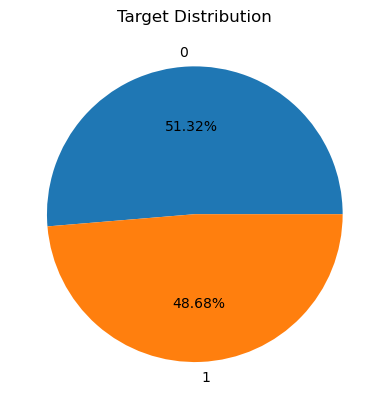

In [4]:
plt.pie(x=heart_df.target.value_counts().values,labels=heart_df.target.unique().tolist(),autopct='%1.2f%%')
plt.title('Target Distribution')
plt.show()

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print('Initial number of rows: ', heart_df.shape)
heart_df.drop_duplicates(inplace=True)
print('Number of rows after dropping duplicates: ', heart_df.shape)

Initial number of rows:  (1025, 14)
Number of rows after dropping duplicates:  (302, 14)


<Axes: >

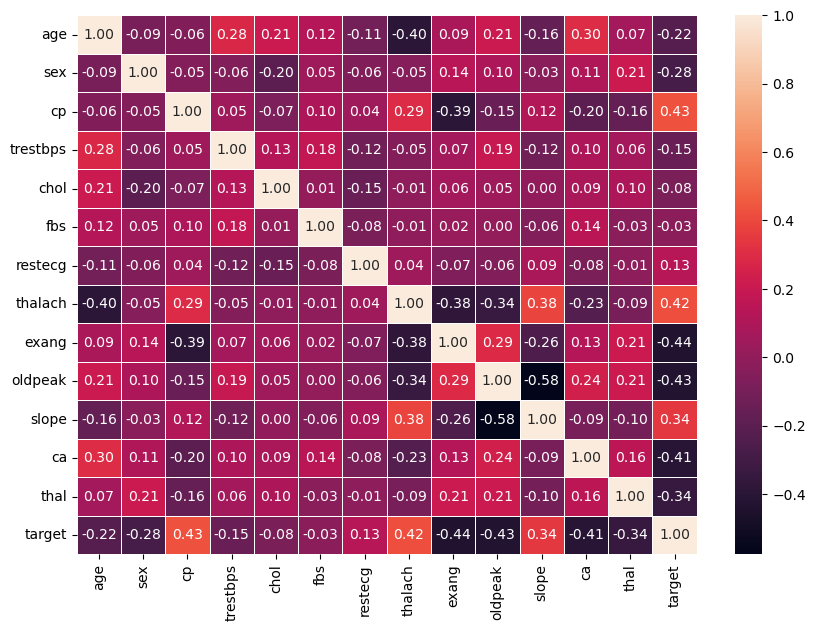

In [8]:
corr_matrix = heart_df.corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

In [9]:
corr_matrix["target"].abs().nlargest(10)

target     1.000000
exang      0.435601
cp         0.432080
oldpeak    0.429146
thalach    0.419955
ca         0.408992
slope      0.343940
thal       0.343101
sex        0.283609
age        0.221476
Name: target, dtype: float64

In [10]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

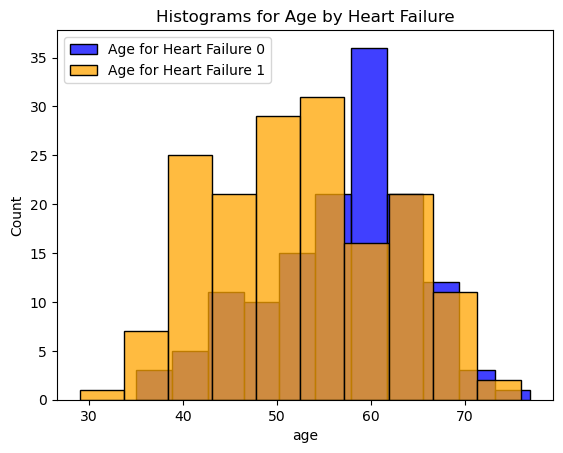

In [11]:
t0 = heart_df[heart_df.target==0]
t1 = heart_df[heart_df.target==1]

sns.histplot(t0.age,kde=False,color="blue", label="Age for Heart Failure 0")
sns.histplot(t1.age,kde=False,color = "orange", label = "Age for Heart Failure 1")
plt.title("Histograms for Age by Heart Failure")
plt.legend()

<Axes: xlabel='target', ylabel='age'>

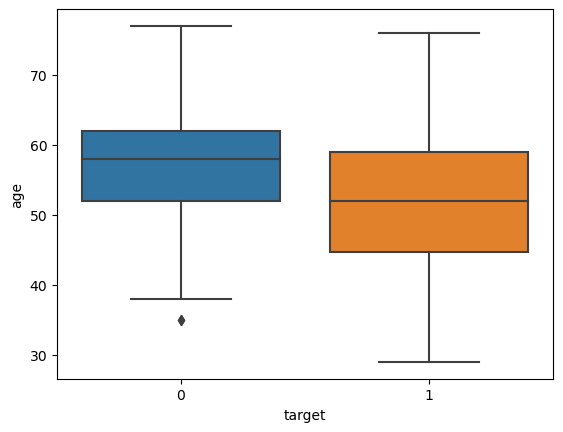

In [12]:
sns.boxplot(x='target', y='age', data=heart_df)

<Axes: xlabel='target', ylabel='age'>

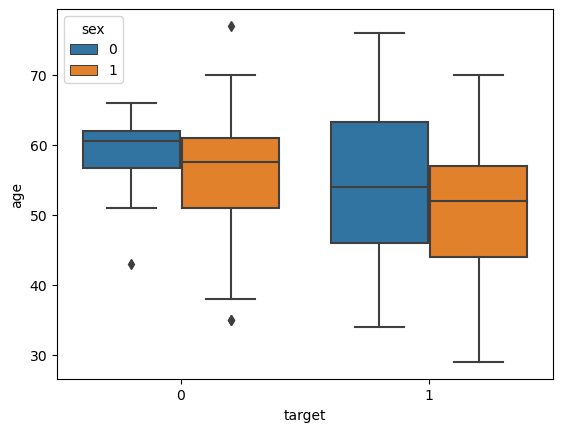

In [13]:
sns.boxplot(x='target', y='age', hue='sex', data=heart_df)

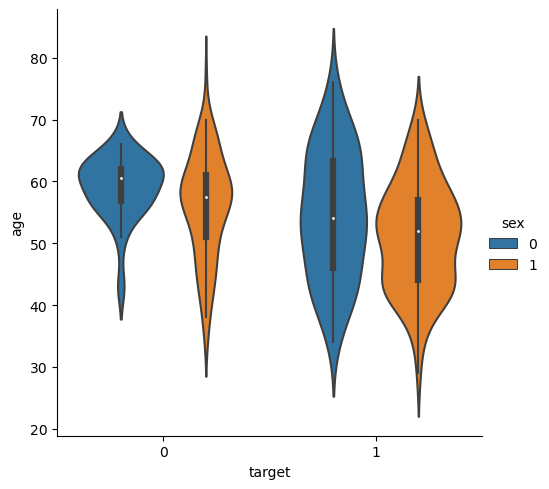

In [14]:
sns.catplot(x='target', y='age', hue='sex', kind='violin', data=heart_df)

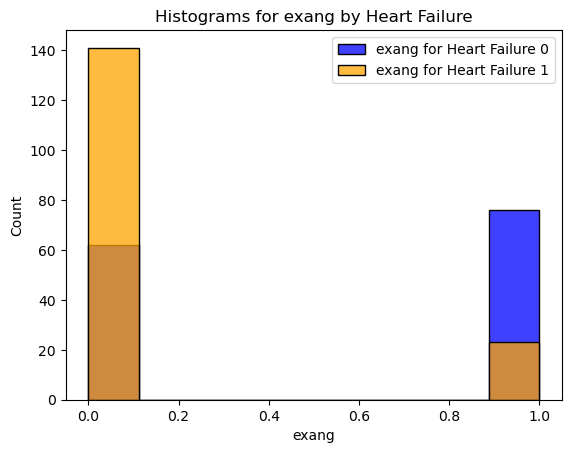

In [15]:
sns.histplot(t0.exang,kde=False,color="blue", label="exang for Heart Failure 0")
sns.histplot(t1.exang,kde=False,color = "orange", label = "exang for Heart Failure 1")
plt.title("Histograms for exang by Heart Failure")
plt.legend()

<Axes: xlabel='target', ylabel='exang'>

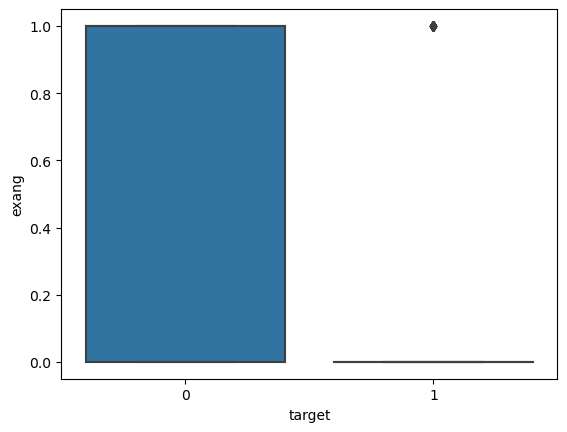

In [16]:
sns.boxplot(x='target', y='exang', data=heart_df)

<Axes: xlabel='target', ylabel='cp'>

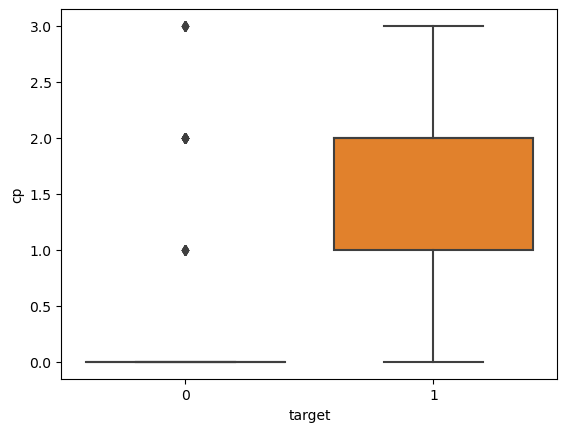

In [17]:
sns.boxplot(x='target', y='cp', data=heart_df)

<Axes: xlabel='target', ylabel='oldpeak'>

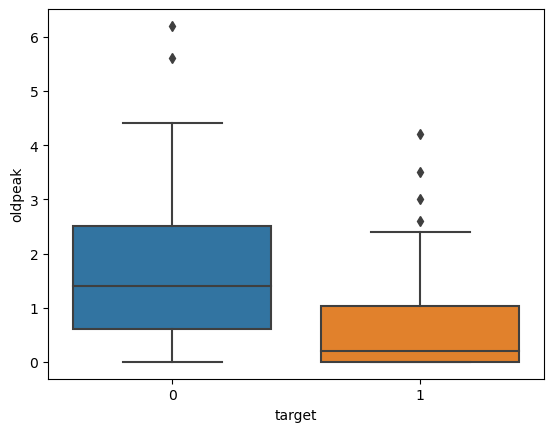

In [18]:
sns.boxplot(x='target', y='oldpeak', data=heart_df)

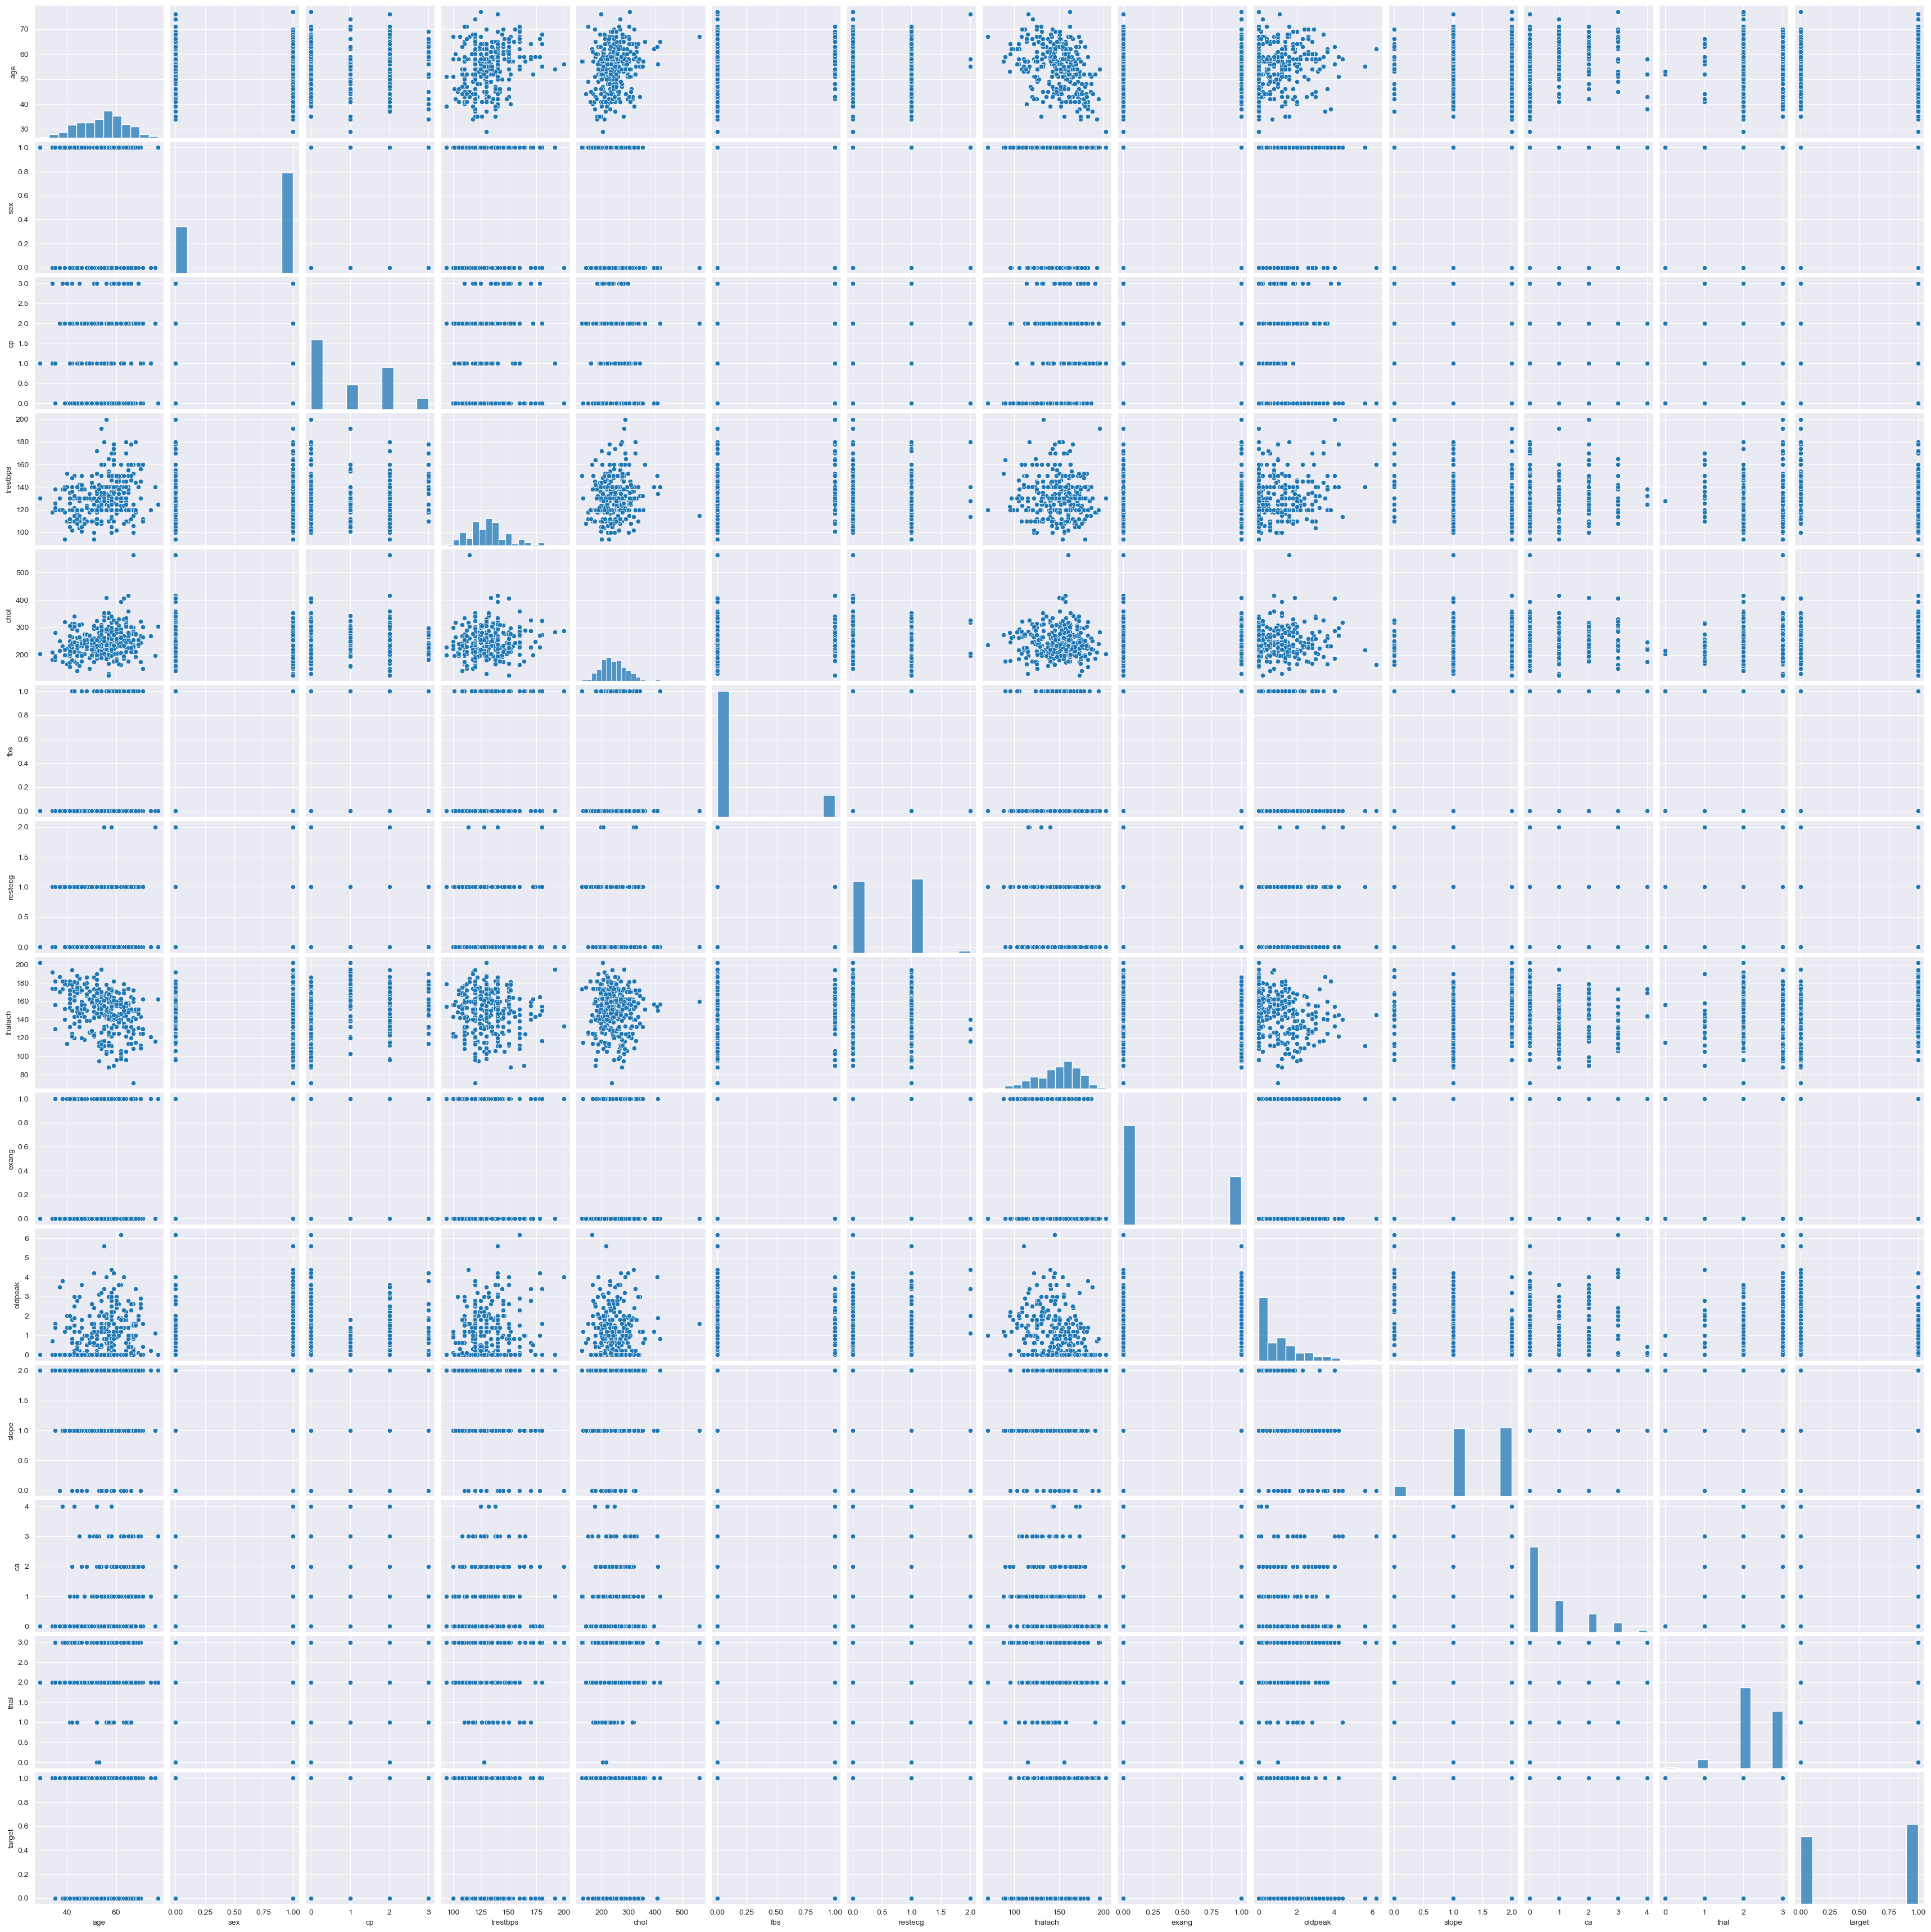

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(heart_df)

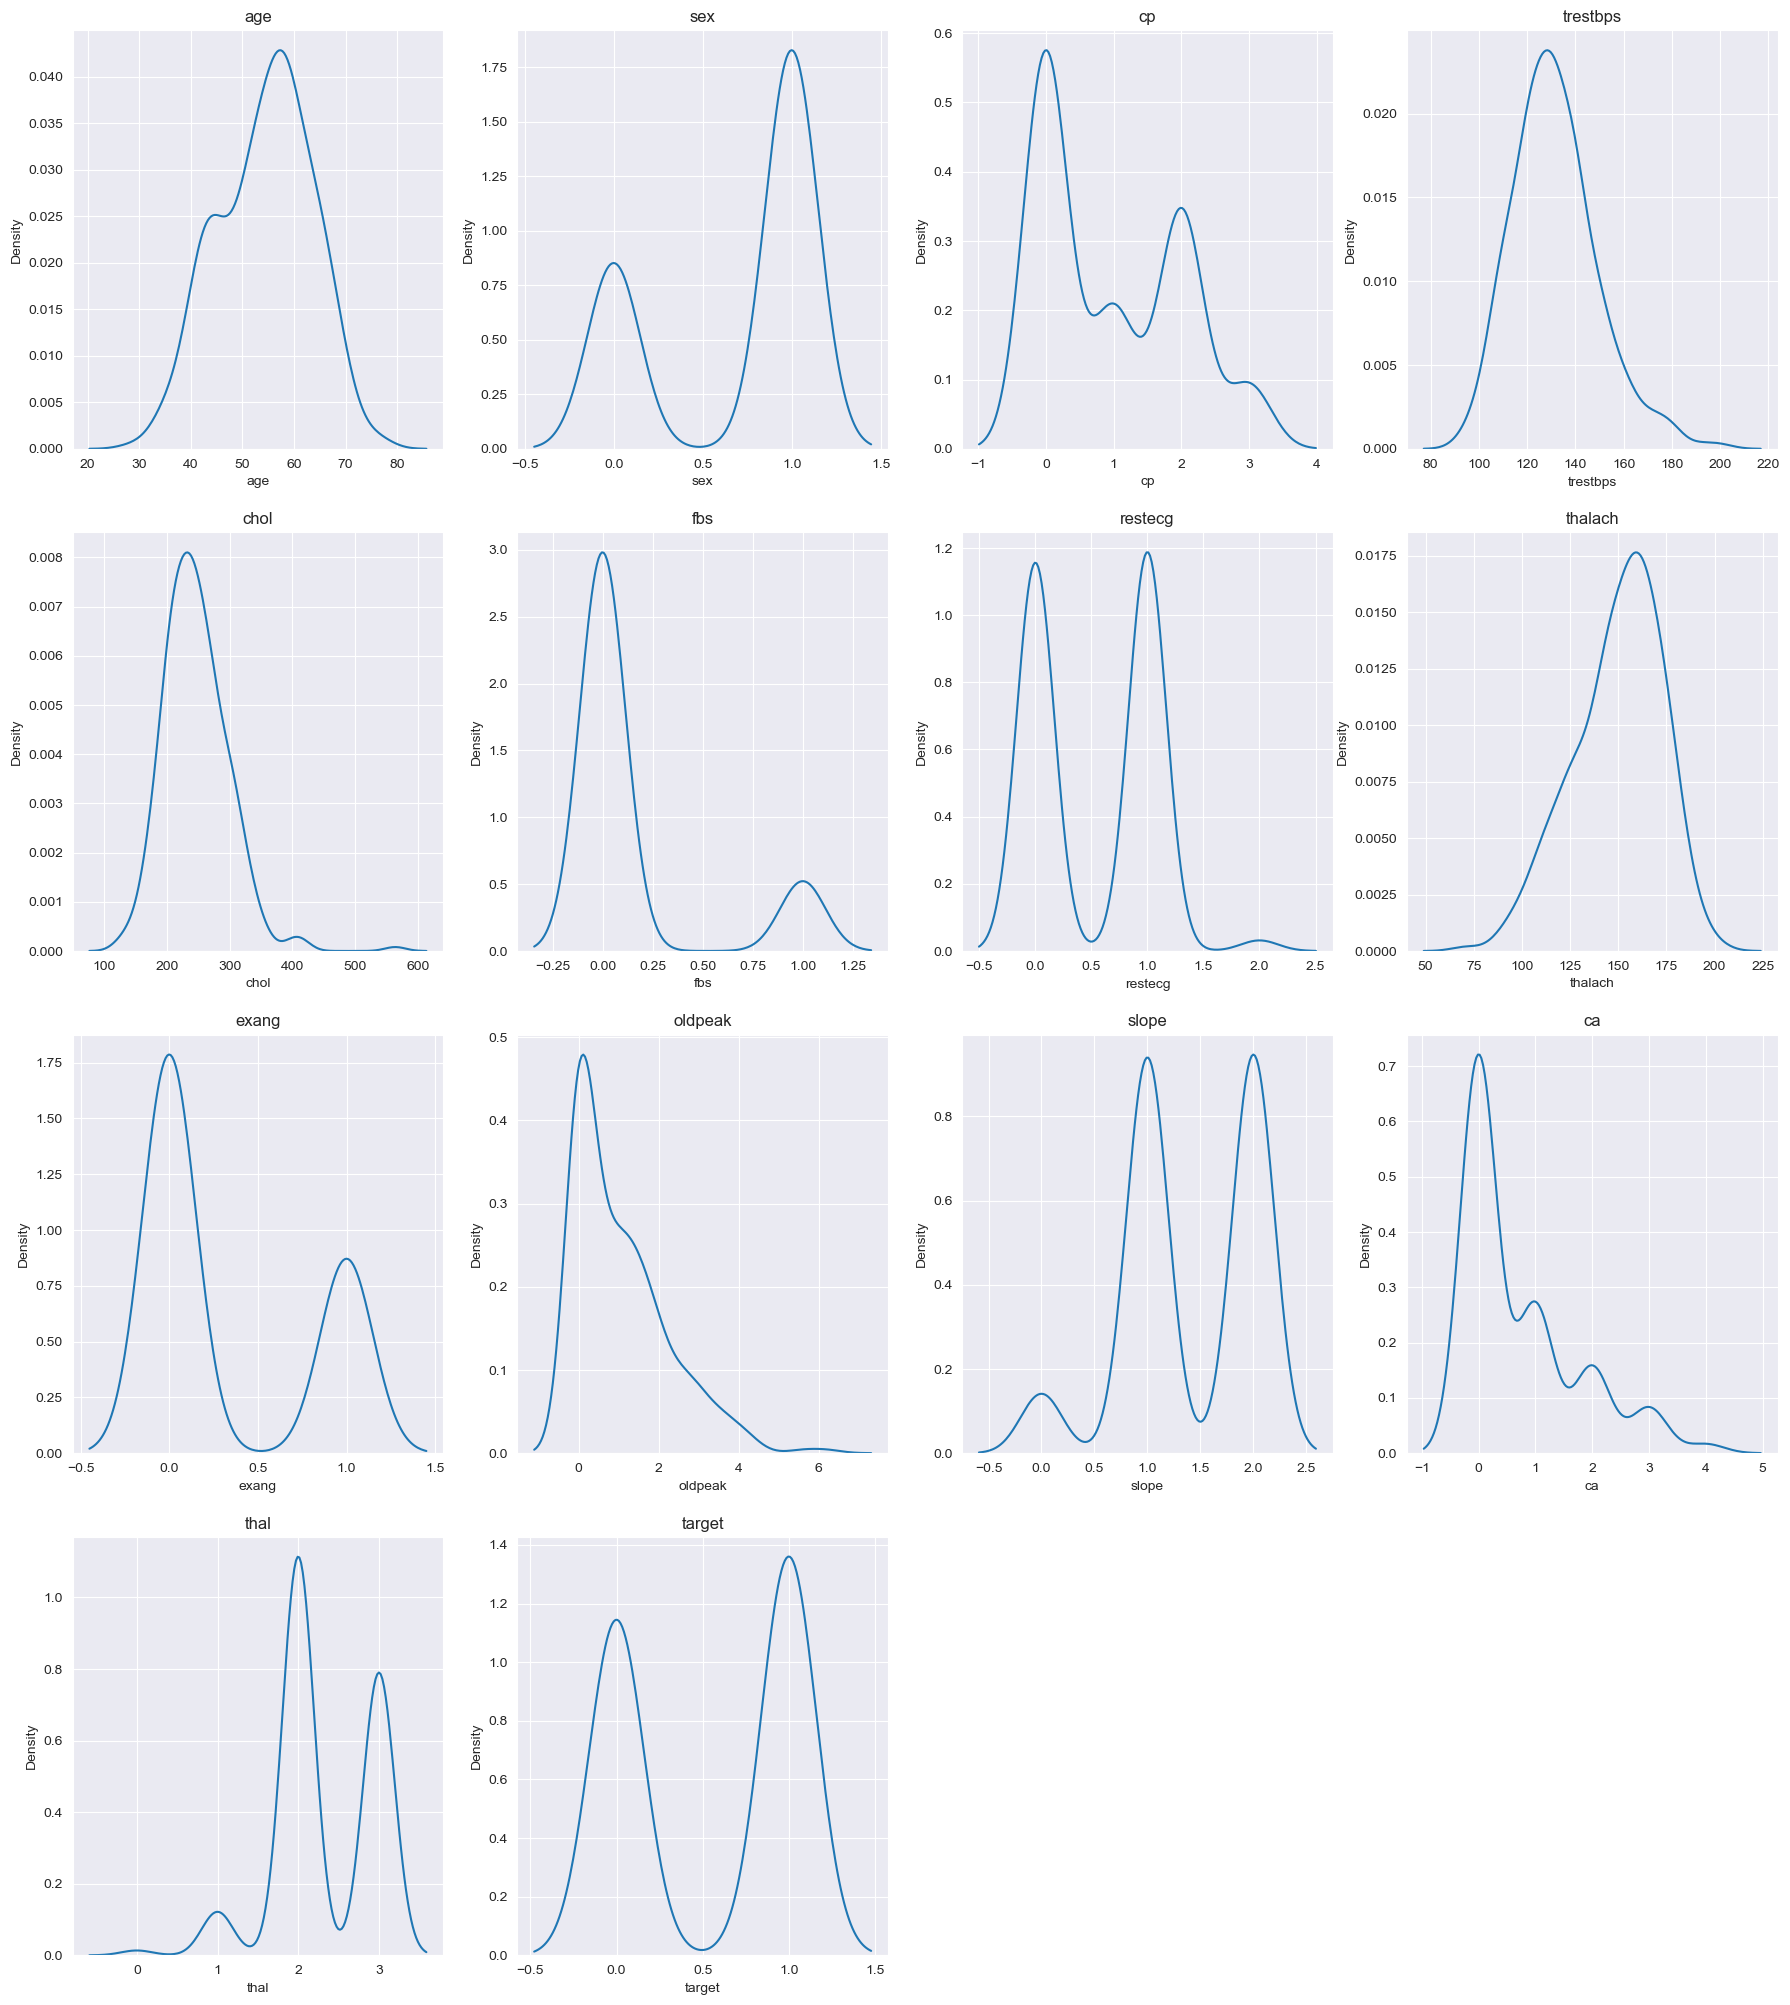

In [20]:
# EDA Univariante
column=heart_df.columns
plt.figure(figsize=(22,25))
for i,col in enumerate(column,1):
    plt.subplot(4,4,i)
    
    try:
        plt.title(col)
        sns.kdeplot(data=heart_df,x=col)
    except:
        plt.title(col)
        sns.countplot(data=heart_df,x=col)
plt.show()

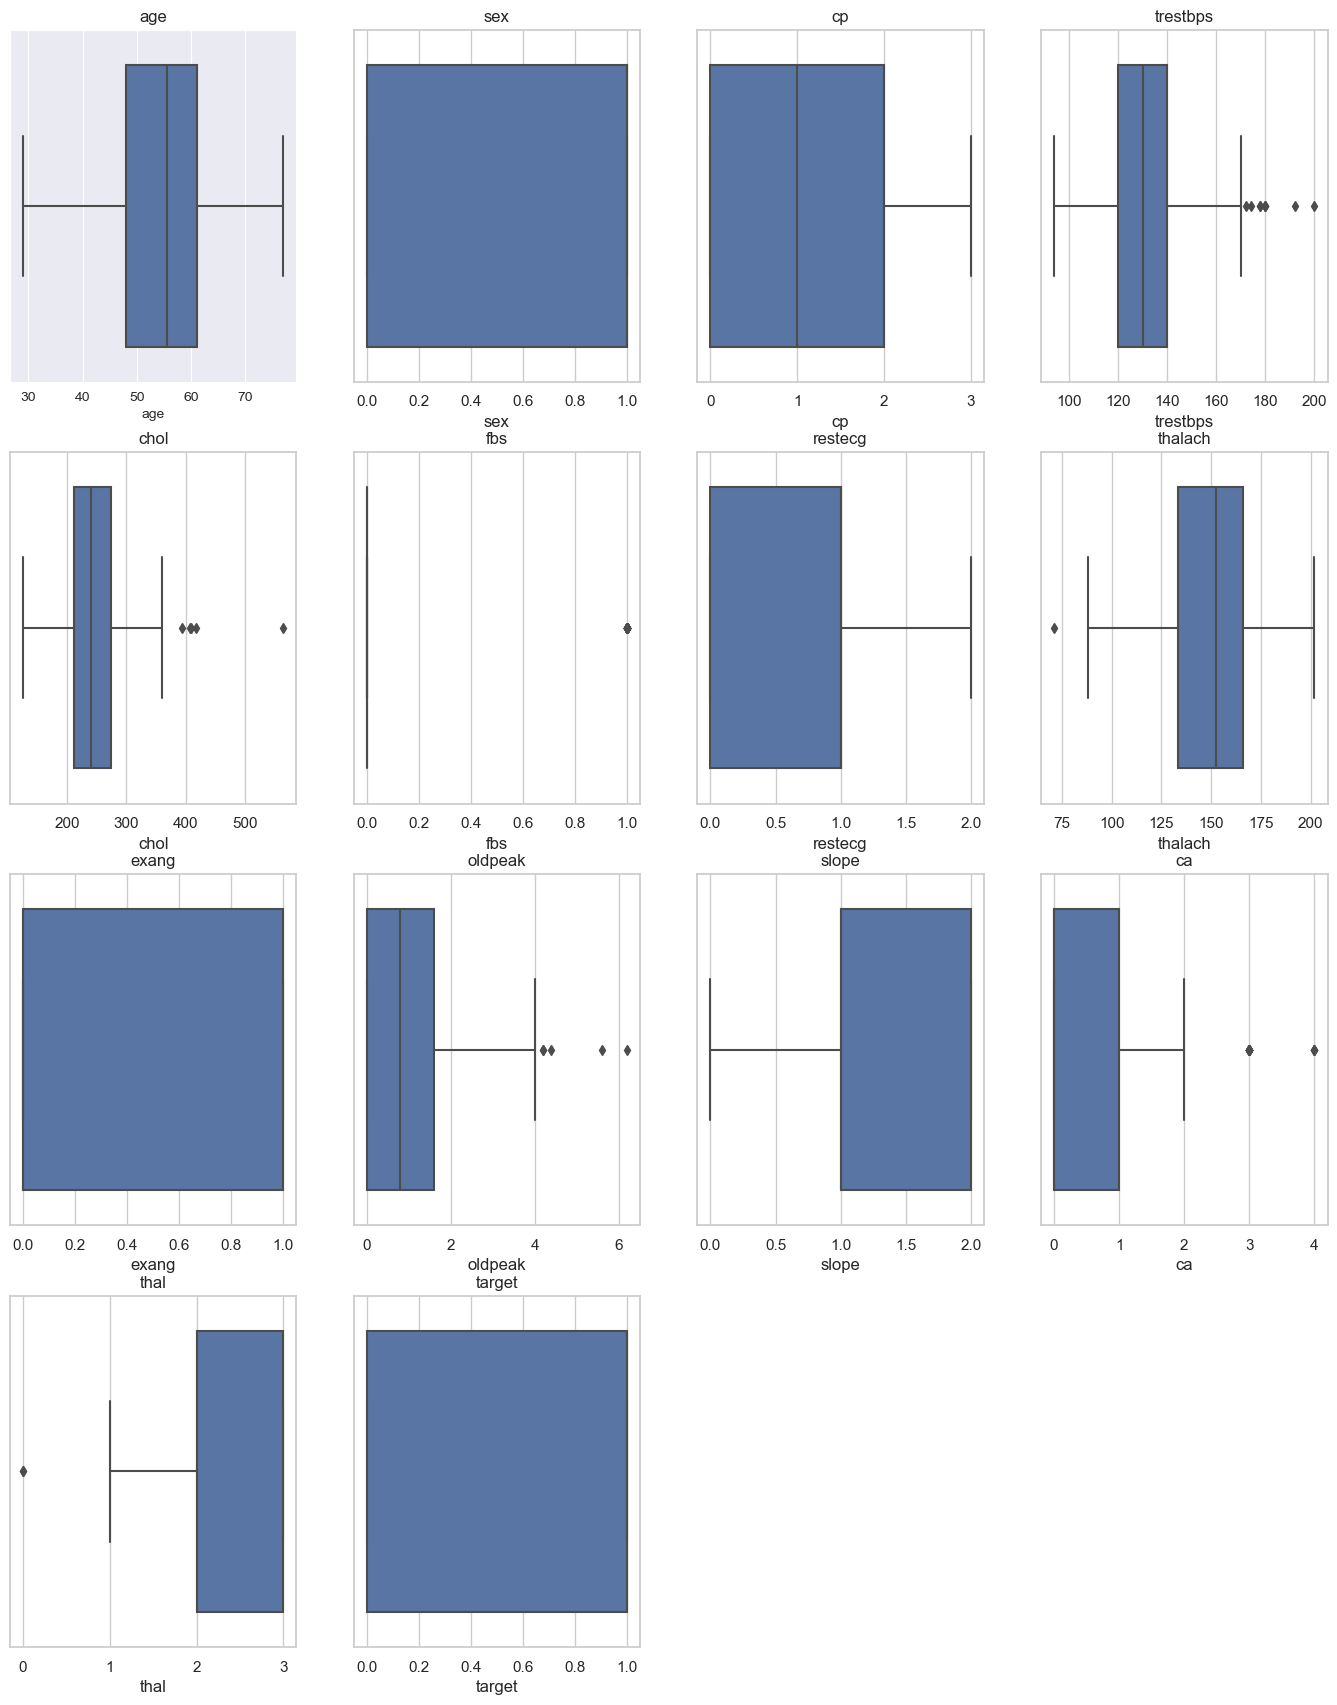

In [21]:
# check outliers
plt.figure(figsize=(17,21))
for i,col in enumerate(column,1):
    plt.subplot(4,4,i)
    sns.set_theme(style="whitegrid")
    
    try:
        plt.title(col)
        sns.boxplot(x=col,data=heart_df)
    except:
        plt.title(col)
        sns.boxplot(x=col,y='age',data=heart_df)
        
plt.show()

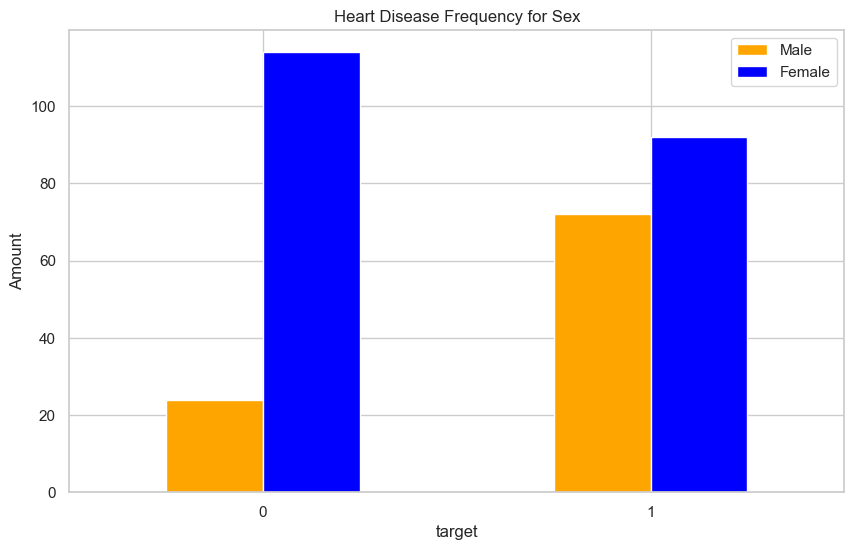

In [22]:
# Visualise relationship between sex and target column
pd.crosstab(heart_df.target, heart_df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["orange", "blue"])

# Add details
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount")
plt.legend(["Male", "Female"]);
plt.xticks(rotation=0);

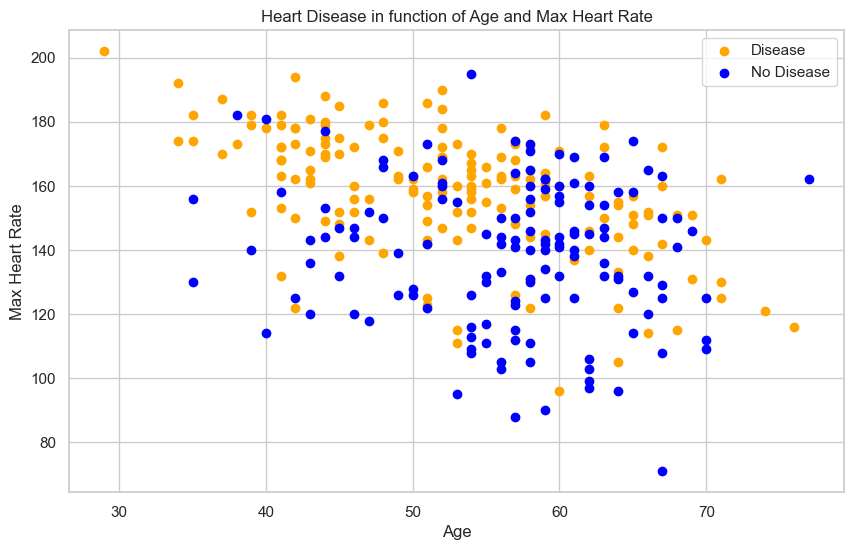

In [23]:
# Visualise Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10, 6))

# Scatter with heart disease samples
plt.scatter(heart_df.age[heart_df.target==1],
            heart_df.thalach[heart_df.target==1],
            c="orange")

# Scatter with non heart disease samples
plt.scatter(heart_df.age[heart_df.target==0],
            heart_df.thalach[heart_df.target==0],
            c="blue")

# Add details
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);